### Import the Necessary Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
import os

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Pandas Rows and columns configuration:

In [3]:
## set this display max columns and rows as 300,assuming max rows and columns can be 300.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Read CSV Files from Dataset Directory:

In [4]:
## get the current directory path
os.getcwd()

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA'

In [5]:
## go to the datsets directory in current path 
file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "application_data.csv")

In [6]:
file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\application_data.csv'

In [7]:
## read the csv file
application_dataset = pd.read_csv(file_path)

In [8]:
application_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Basic stats about rows and columns and Missing values:

In [9]:
application_dataset.shape

(307511, 122)

### From the Shape,We Can See that 307511 rows and 122 columns, these 122 columns may not be useful for the ### analysis,we can eliminate irrelevant columns and perform analysis on the selected ones which are important to the business logic.

In [10]:
application_dataset.info(max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## Data Cleaning Sanity Checks:

#### 1. Missing values identification and scenarios.

#### 2. Eliminate the columns if missing values percentage greater than 50%.

#### 3. Remove unnecessary columns we cant get any insights from them.

#### 4. Drop the records if missing values percentage less than 5%.

#### 5. Conversion of negative values to positive for few columns.

#### 6. Missing values Imputation for categorical values.

#### 7. Missing values Imputation for numerical values.

####  8.Outliers Detection in numerical values.


### Missing values Identification and Scenarios:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [11]:
missing_values = (application_dataset.isnull().sum()/len(application_dataset))*100

In [12]:
missing_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [13]:
## drop the columns whenever missing values greater than 50% because we cant use these for analysis
columns_to_drop=application_dataset.columns[application_dataset.isnull().sum() >= (0.50*len(application_dataset))]
len(columns_to_drop)

41

In [14]:
application_dataset.drop(columns_to_drop, inplace = True, axis = 1)


## Irrelevant Columns Elimination:

In [15]:
unnecessary_columns = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 
                      'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
                       'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                      'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                      'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                      'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                      'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [16]:
len(unnecessary_columns)

30

# Reasons for Irrelevant columns : 
## External sources:
   ###  1.These columns are irreleveant because it has the information collected from the external data,since we dont know the exact source from this data collected we cannot get any meaningful insights from them.
   
## Flag Documents:
   ###  2. Flag documents are the various types of documents provided by customer , since we dont know what types of documents provided by the customer, we can eliminate them completely.
   
### Apartment Variables:
   ### 3. These are the normalized information from the external source.These might not be helpful in analysis with target variable. 
   
### Note: I am not eliminating these columns from the original dataset..!!

In [17]:
application_dataset =  application_dataset.drop(unnecessary_columns, axis = 1)


### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [18]:
Five_percentage_columns =application_dataset.columns[(application_dataset.isnull().sum() <= (0.05*len(application_dataset)))&(application_dataset.isnull().sum() > (0*len(application_dataset)))]


In [19]:
Five_percentage_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [20]:
## verify the above records drop the above columns wherever it is null.
(application_dataset.isnull().sum()/len(application_dataset))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [21]:
## drop the missing values records for the above columns
## columns used : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],
application_dataset = application_dataset.dropna(subset=Five_percentage_columns).reset_index(drop=True)

In [22]:
application_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## Conversion of negative to positive:

In [23]:
application_dataset[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = application_dataset[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()


### Why should we convert the above columns into positive values:
    
### 1.For all these columns,duration or period of check cannot be negative.so need to convert this into positive values.

### Missing values Imputation for categorical Variables:

In [24]:
## identify the categorical columns
categorical_columns = application_dataset.select_dtypes(include=["bool","object","category"]).columns


In [25]:
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [26]:
## Null percentage for categorical columns
((application_dataset[categorical_columns].isnull().sum())/len(application_dataset))*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.351475
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

#### From these we can see that OCCUPATION_TYPE have the highest percentage.

### 1.Replace the missing values for occupation_type:

<AxesSubplot:>

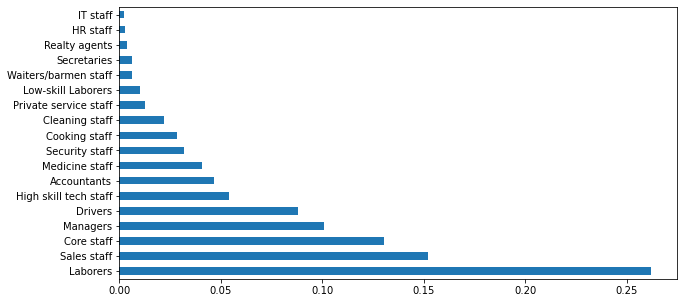

In [27]:
application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True).plot.barh(figsize = (10,5))


### Reasons:

#### 1. Since the null value percentage  is huge,we cannot replace with the mode "laborers" without having proper source of income and information about the various occupational salary ranges. so we are replacing it as other category.

In [28]:
## replace the missing value for occupation_type as other_category
application_dataset["OCCUPATION_TYPE"] = application_dataset["OCCUPATION_TYPE"].fillna("Other_Category")

<AxesSubplot:>

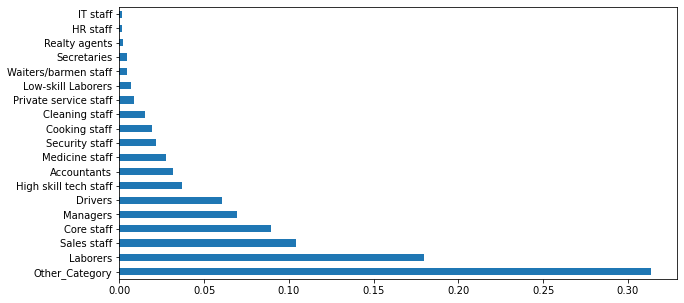

In [29]:
application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True).plot.barh(figsize = (10,5))


## Missing values Imputation for numerical columns:

In [30]:
numerical_columns = application_dataset.select_dtypes(include=["number"]).columns

In [31]:
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_Y

In [32]:
((application_dataset[numerical_columns].isnull().sum())/len(application_dataset))*100

SK_ID_CURR                      0.00000
TARGET                          0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00000
AMT_GOODS_PRICE                 0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000
FLAG_CONT_MOBILE                0.00000
FLAG_PHONE                      0.00000
FLAG_EMAIL                      0.00000
CNT_FAM_MEMBERS                 0.00000
REGION_RATING_CLIENT            0.00000
REGION_RATING_CLIENT_W_CITY     0.00000
HOUR_APPR_PROCESS_START         0.00000
REG_REGION_NOT_LIVE_REGION      0.00000
REG_REGION_NOT_WORK_REGION      0.00000
LIVE_REGION_NOT_WORK_REGION     0.00000


In [33]:
application_dataset[numerical_columns]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
305180      456251       0             0          157500.0    254700.0   
305181      456252       0             0           72000.0    269550.0   
305182      456253       0             0          153000.0    677664.0   
305183      456254       1             0          171000.0    370107.0   
305184      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801      9461.0   
1           35698.5        1129500.0                    0.003541     16765.0   
2            6750.0         135000.0                    0.010032     19046.0   
3           29686.5         297000.0                    0.008019     19005.0   
4           21865.5         513000.0                    0.028663     19932.0   
...             ...              ...                         ...         ...   
305180      27558.0         225000.0                    0.032561      9327.0   
305181      12001.5         225000.0                    0.025164     20775.0   
305182      29979.0         585000.0                    0.005002     14966.0   
305183      20205.0         319500.0                    0.005313     11961.0   
305184      49117.5         675000.0                    0.046220     16856.0   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0               637.0             3648.0           2120.0           1   
1              1188.0             1186.0            291.0           1   
2               225.0             4260.0           2531.0           1   
3              3039.0             9833.0           2437.0           1   
4              3038.0             4311.0           3458.0           1   
...               ...                ...              ...         ...   
305180          236.0             8456.0           1982.0           1   
305181       365243.0             4388.0           4090.0           1   
305182         7921.0             6737.0           5150.0           1   
305183         4786.0             2562.0            931.0           1   
305184         1262.0             5128.0            410.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
305180               1                0                 1           0   
305181               0                0                 1           1   
305182               1                0                 1           0   
305183               1                0                 1           0   
305184               1                1                 1           1   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                0              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                0              1.0                     2   
...            ...              ...   

In [34]:
len(categorical_columns)

12

In [35]:
len(numerical_columns)

39

AMT_REQ_CREDIT_BUREAU_WEEK

###  Imputation on with Mean for below application_dataset variables/Columns


AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QTR,AMT_REQ_CREDIT_BUREAU_YEAR 

###  4.AMT_REQ_CREDIT_BUREAU_MON

### 5.AMT_REQ_CREDIT_BUREAU_QRT

### Outliers Detection in Numerical Columns:

#### CNT_CHILDREN

Statistical Summary :
 count    305185.000000
mean          0.417150
std           0.722267
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
Unique Values & Counts
 0     70.032276
1     19.876141
2      8.701935
3      1.208775
4      0.139587
5      0.027524
6      0.006881
7      0.002294
14     0.000983
19     0.000655
12     0.000655
10     0.000655
9      0.000655
8      0.000655
11     0.000328
Name: CNT_CHILDREN, dtype: float64


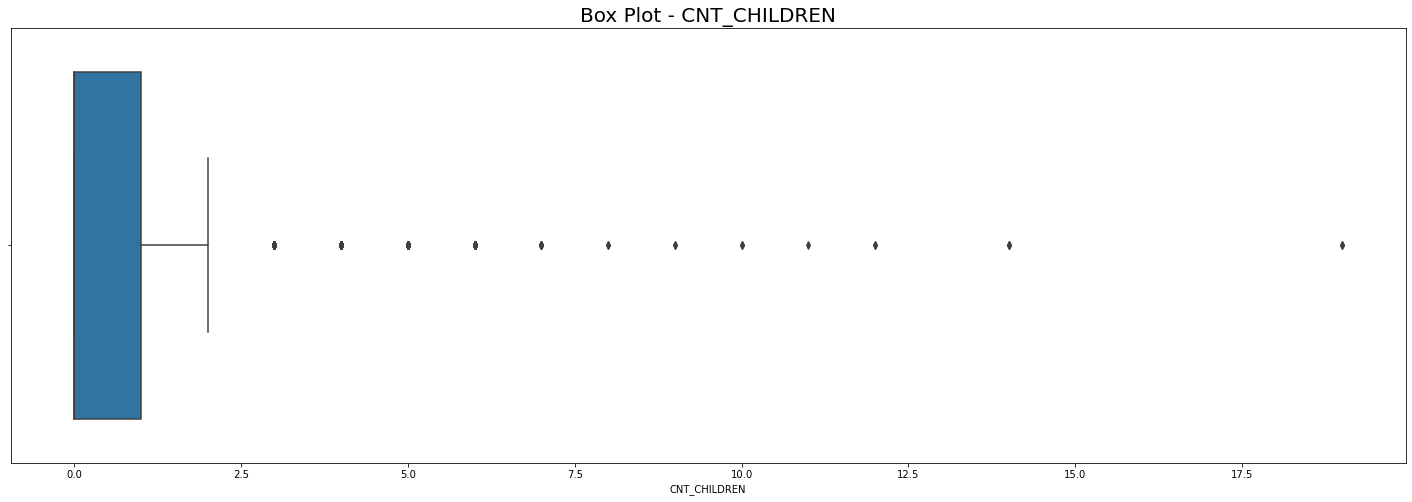

Data points appear above the UPPER_WHISKER 2.5 can be statistically considered as the Outliers.


In [84]:
print("Statistical Summary :\n",application_dataset['CNT_CHILDREN'].describe())
print("Unique Values & Counts\n",application_dataset['CNT_CHILDREN'].value_counts(normalize =True) * 100)
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['CNT_CHILDREN'])
plt.title("Box Plot - CNT_CHILDREN", fontsize = 20 )
plt.show()
Q1 = application_dataset['CNT_CHILDREN'].quantile(0.25)
Q3 = application_dataset['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many data points appear above the UPPER_WHISKER 2.5 can be statistically considered as the Outliers.
#### But in real time,there exists families with 10-12 childern

## Convert the  Data type to int

#### AMT_INCOME_TOTAL

Satitistical Summary :
 count    3.051850e+05
mean     1.686140e+05
std      2.376652e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.458000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


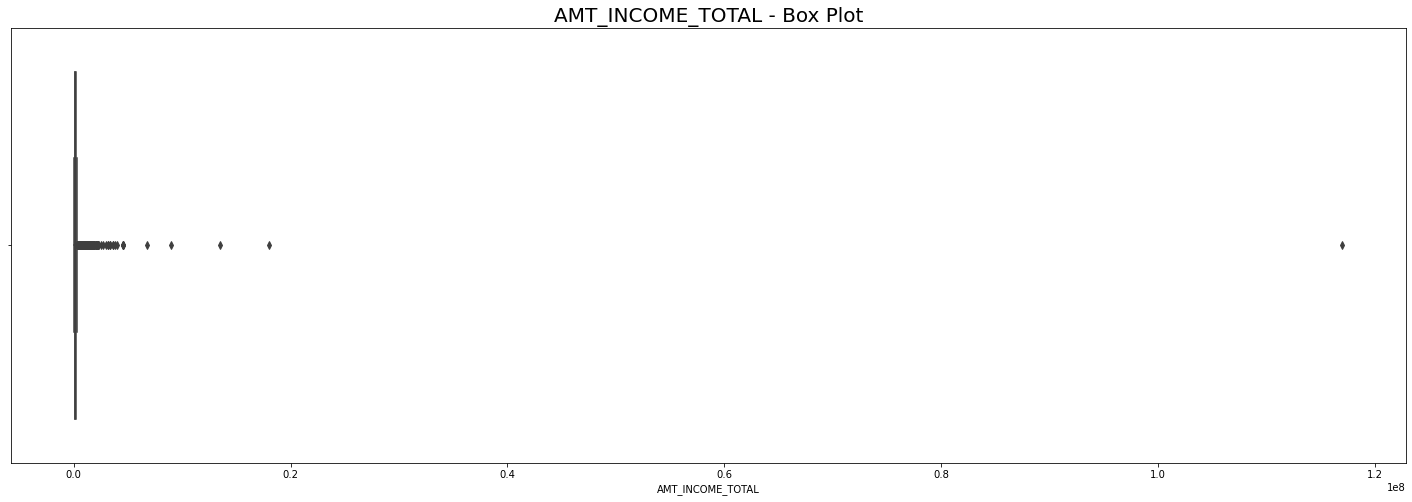

Data points appear above the UPPER_WHISKER 337500.0 can be statistically considered as the Outliers


In [40]:
print("Satitistical Summary :\n",application_dataset['AMT_INCOME_TOTAL'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers".format(upper_whisker))

#### Many data points appear above the UPPER_WHISKER 337500.0 are clustered and one data is tto far away.
#### But in real time the Income has no boundaries and can be high for different Income Types.

#### AMT_CREDIT

 Statistical Summary :
 count    3.051850e+05
mean     5.992816e+05
std      4.020170e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


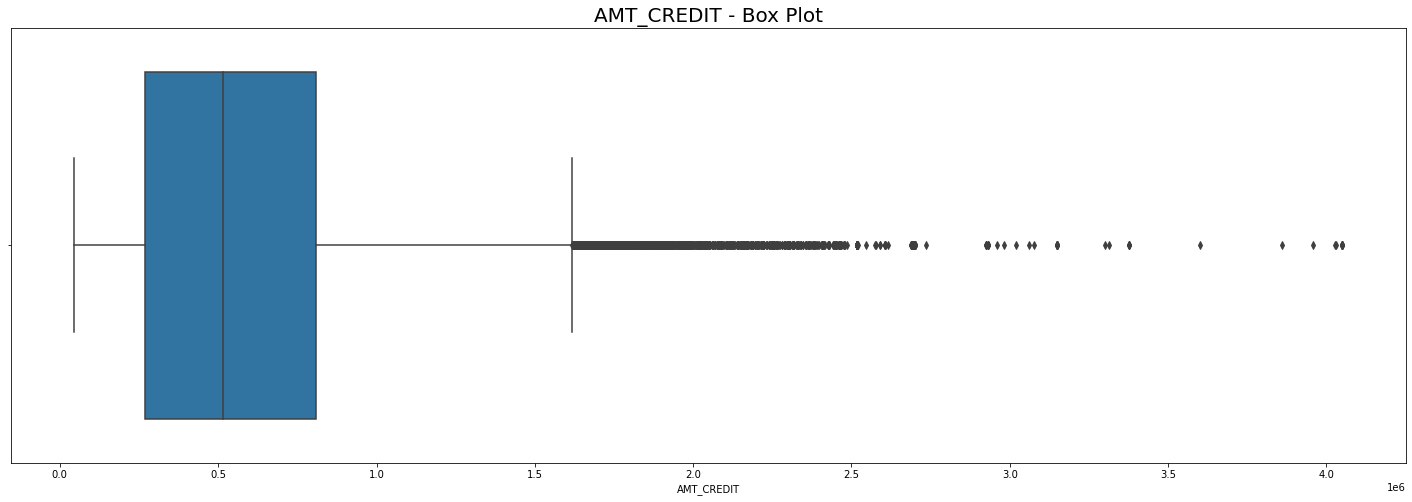

Data points appear above the UPPER_WHISKER 1616625.0 can be statistically considered as the Outliers.


In [41]:
print(" Statistical Summary :\n",application_dataset['AMT_CREDIT'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_CREDIT'])
plt.title("AMT_CREDIT - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
Q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many data points appear to be clustered above the UPPER_WHISKER 1616625.0  and many far away from the Upper_WHISKER.
#### But these values cannot be considered as outliers in real time as the Credit amount might be high for high Income groups

#### AMT_ANNUITY

 Statistical Summary :
 count    305185.000000
mean      27136.759613
std       14476.069729
min        1615.500000
25%       16573.500000
50%       24939.000000
75%       34618.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


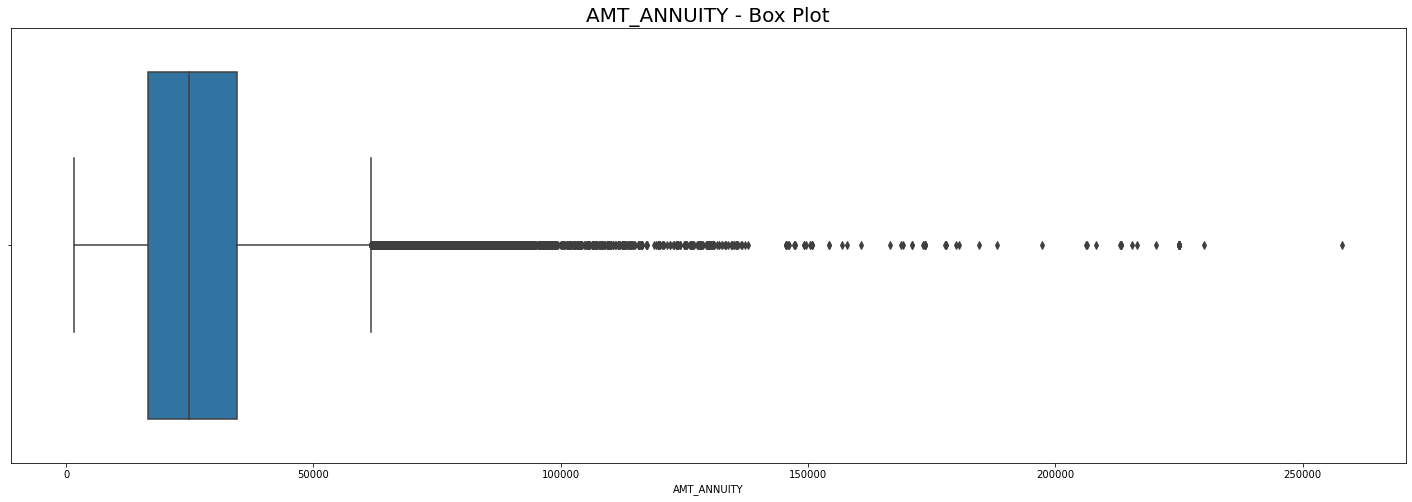

Data points appear above the UPPER_WHISKER 61686.0 can be statistically considered as the Outliers.


In [42]:
print(" Statistical Summary :\n",application_dataset['AMT_ANNUITY'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_ANNUITY'])
plt.title("AMT_ANNUITY - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_ANNUITY'].quantile(0.25)
Q3 = application_dataset['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data points are clustered above the Upper Whisker and many appear to be far away.
#### These Annuity data points  are based on the Credit_Amount and cannot be considered as Outliers

#### AMT_GOODS_PRICE

 Statistical Summary :
 count    3.051850e+05
mean     5.382271e+05
std      3.689286e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


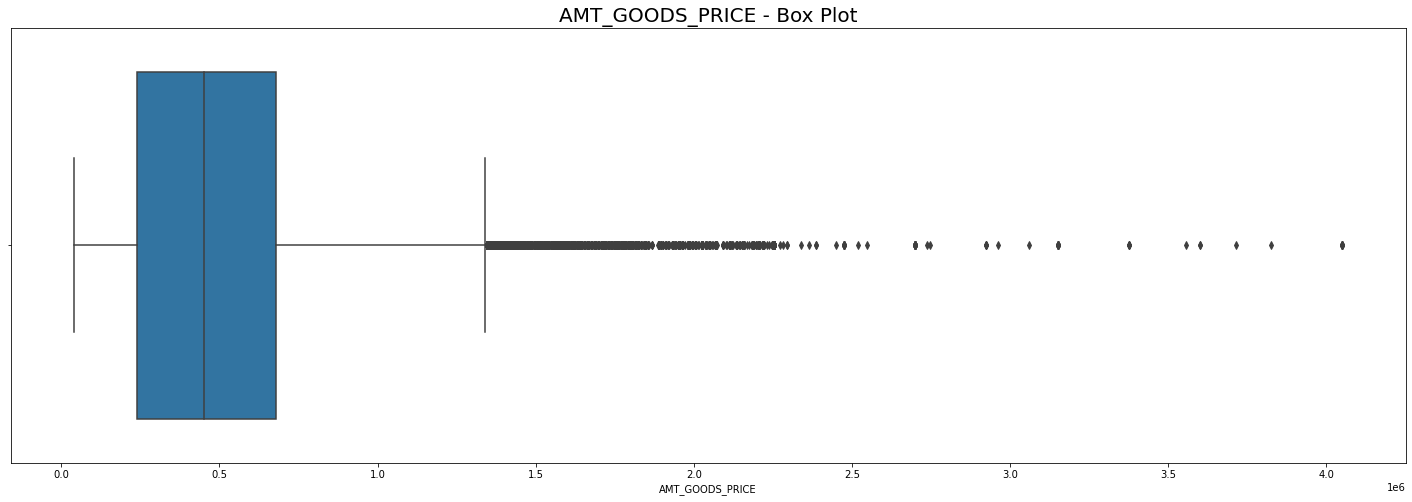

Data points appear above the UPPER_WHISKER 1341000.0 can be statistically considered as the Outliers.


In [43]:
print(" Statistical Summary :\n",application_dataset['AMT_GOODS_PRICE'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_dataset['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data Points are clustered above UpperWhisker and far away from the upper Whisker
#### These points cannot be cosidered as Outliers as we do not enough source related to the Goods Categories & its Price to prove that this data points are outliers 

#### DAYS_BIRTH

 Statistical Summary :
 count    305185.000000
mean      16041.650124
std        4362.501707
min        7489.000000
25%       12420.000000
50%       15756.000000
75%       19685.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


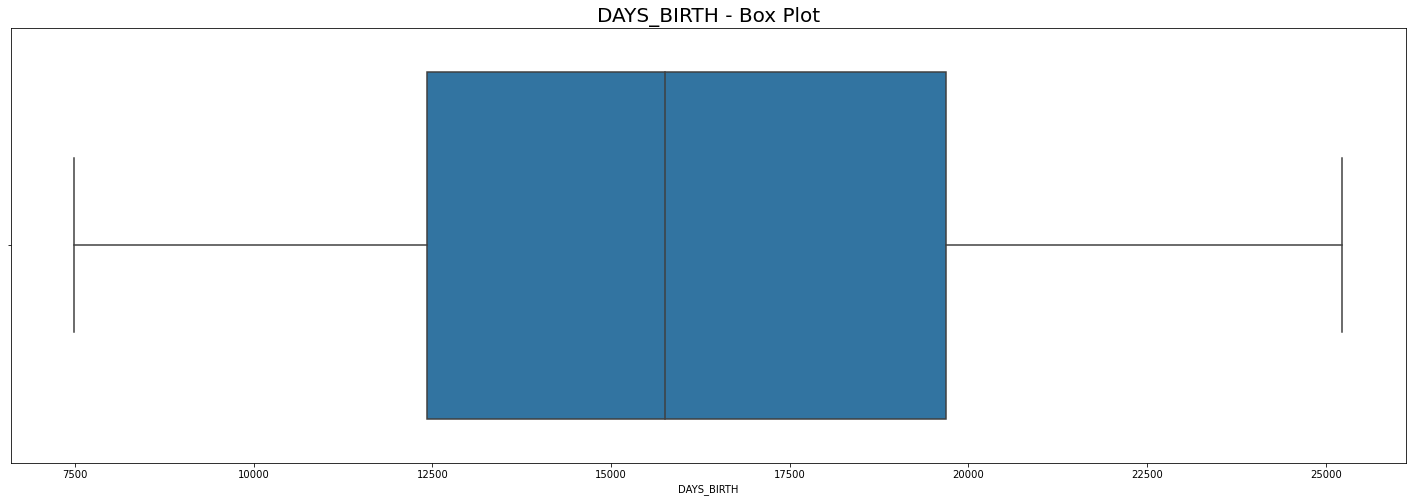

No Data points appear above the UPPER_WHISKER 30582.5


In [44]:
print(" Statistical Summary :\n",application_dataset['DAYS_BIRTH'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['DAYS_BIRTH'])
plt.title("DAYS_BIRTH - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_BIRTH'].quantile(0.25)
Q3 = application_dataset['DAYS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
birth_max = application_dataset['DAYS_BIRTH'].max()

print("No Data points appear above the UPPER_WHISKER {}".format(upper_whisker))

#### No Outliers Present in DAYS_BIRTH Column

#### DAYS_EMPLOYED

 Statistical Summary :
 count    305185.000000
mean      67786.302803
std      139493.552248
min           0.000000
25%         934.000000
50%        2221.000000
75%        5718.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


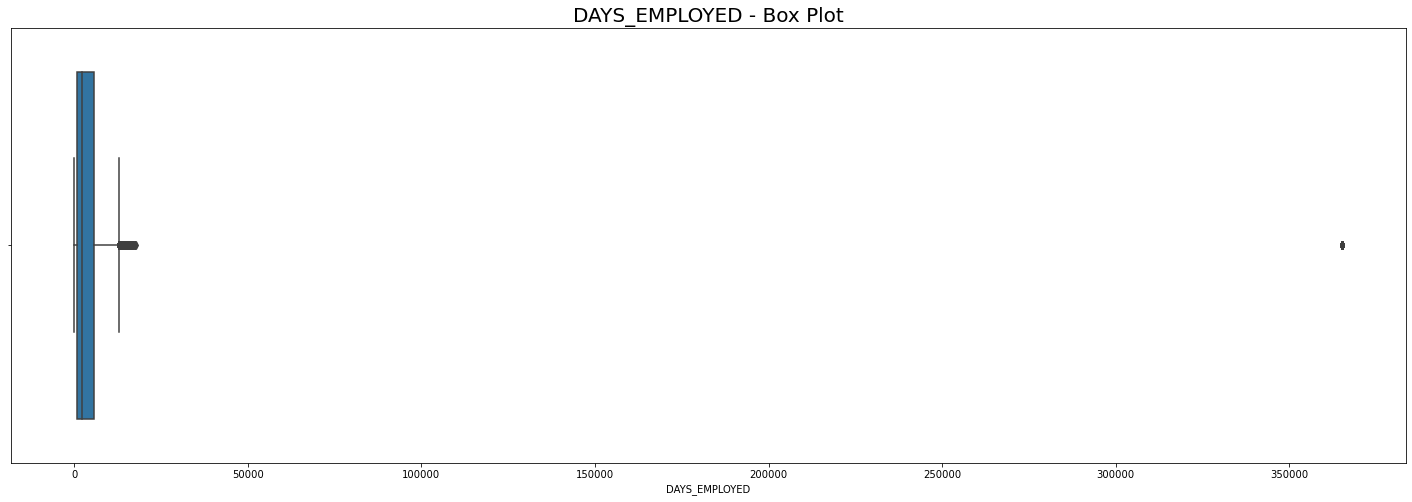

Data points appear above the UPPER_WHISKER 12894.0 can be statistically considered as the Outliers.
Max Value of Days_Employed is 365243.0 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229.0


In [45]:
print(" Statistical Summary :\n",application_dataset['DAYS_EMPLOYED'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['DAYS_EMPLOYED'])
plt.title("DAYS_EMPLOYED - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_EMPLOYED'].quantile(0.25)
Q3 = application_dataset['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
employed_max = application_dataset['DAYS_EMPLOYED'].max()

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))
print(f"Max Value of Days_Employed is {employed_max} insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH {birth_max}")

#### Some data points are clusteres above the Upper Whisker & one data point is very far from the Upper Whisker.
####  Max Value of Days_Employed is 365243.0 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229.0
#### This value should be considered as Outlier and replaced with "      " 

Scenarios:
1. Low Income High credit amount & Annuity
2. 

Hypothesis:
Type 1 Error:
1. High Income & Target = 0
2. 
Type 2 Error:
1. Low Income High credit amount, Annuity & Target = 1

In [46]:
application_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [47]:
### Univariate Analysis:

## 1. Histograms ,boxplots,distribution plots
## 2. pie charts

In [48]:
## BI variate analysis:

## 1. numerical to numerical analysis(scatter plots,correlation,pairplots/jointplots)

## 2. numerical to categorical analysis()

### 3. categorical to categorical analysis(binning,segmentation)

Multi Variate: 

### 4.heatmap /correlation matrix 

### 5. Stacked bar chart , stacked bar chart(trend)



# UNIVARITE Analysis


### Numerical  - Sub plots with Dist plots for below numerical columns

### AMT_ANNUITY - HIST ,  

## AMT_INCOME_TOTAL - HIST

## AMT_CREDIT - HIST

## AMT_GOODS_PRIC - HIST

## Target : Convert it to 2 data file
## With 1 : Sub plots with Dist plots with quntiles for  numerical columns 
## With 0 : Sub plots with Dist plots for  numerical columns 

## Categorical 

#### All categorical with bar   
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.351475
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000

In [ ]:
NAME_CONTRACT_TYPE'

## Read Previous_Application.CSV Files from Dataset Directory

In [49]:
previous_file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "previous_application.csv")

In [50]:
previous_file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\previous_application.csv'

In [51]:
previous_dataset = pd.read_csv(previous_file_path)

In [52]:
previous_dataset.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [53]:
previous_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Basic stats about rows and columns and Missing values:

In [54]:
previous_dataset.shape

(1670214, 37)

### Statistics Summary of the Numerical Data Columns:

In [55]:
previous_dataset.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### From the Shape,We Can See that 1670214 rows and 37 columns, these 37 columns may not be useful for the ### analysis,we can eliminate irrelevant columns and perform analysis on the selected ones which are important to the business logic.

### Missing values Identification:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [56]:
missing_values_previous = (previous_dataset.isnull().sum()/len(previous_dataset))*100

In [57]:
missing_values_previous

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### RATE_INTEREST_PRIMARY          99.643698
#### RATE_INTEREST_PRIVILEGED       99.643698

#### Need to understand if the specific variables data helps in Accepting or Rejecting the Loan.

In [58]:
## drop the columns whenever missing values greater than 50% because we cant use these for analysis

columns_to_drop_previous = previous_dataset.columns[previous_dataset.isnull().sum() >= (0.50*len(previous_dataset))]
len(columns_to_drop_previous)

4

In [59]:
previous_dataset.drop(columns_to_drop_previous, inplace = True, axis = 1)

In [79]:
previous_dataset.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [63]:
Five_percentage_columns_previous = previous_dataset.columns[(previous_dataset.isnull().sum() <= (0.05*len(previous_dataset)))&(previous_dataset.isnull().sum() > (0*len(previous_dataset)))]


In [64]:
Five_percentage_columns_previous

Index(['AMT_CREDIT', 'PRODUCT_COMBINATION'], dtype='object')

In [65]:
## verify the above records drop the above columns wherever it is null.
(previous_dataset.isnull().sum()/len(previous_dataset))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [66]:
## drop the missing values records for the above columns 
## columns used : ['AMT_CREDIT', 'PRODUCT_COMBINATION']
previous_dataset = previous_dataset.dropna(subset=Five_percentage_columns_previous).reset_index(drop=True)

In [67]:
previous_dataset.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

In [68]:
previous_dataset.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.669867e+06  1.669867e+06  1.297978e+06     1.669867e+06   
mean   1.923089e+06  2.783587e+05  1.595513e+04     1.752703e+05   
std    5.325994e+05  1.028150e+05  1.478214e+04     2.927993e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461858e+06  1.893300e+05  6.321780e+03     1.879650e+04   
50%    1.923117e+06  2.787210e+05  1.125000e+04     7.105500e+04   
75%    2.384284e+06  3.675140e+05  2.065842e+04     1.804410e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.669867e+06     1.284699e+06             1.669867e+06   
mean   1.961547e+05     2.278473e+05             1.248412e+01   
std    3.185951e+05     3.153966e+05             3.334075e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.419200e+04     5.084100e+04             1.000000e+01   
50%    8.055000e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.669867e+06   1.669867e+06      1.669867e+06  1.297983e+06   
mean             9.964668e-01  -8.807762e+02      3.140069e+02  1.605409e+01   
std              5.933577e-02   7.791505e+02      7.128183e+03  1.456729e+01   
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00   
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00   
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01   
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01   
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    76582.403064      81992.343838                   0.332570  
std    149647.415123     153303.516729                   0.471134  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1314.000000      -1270.000000                   0.000000  
50%      -537.000000       -499.000000                   0.000000  
75%       -74.000000        -44.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

## Conversion of negative to positive:

In [69]:
#DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
previous_dataset[['DAYS_DECISION','SELLERPLACE_AREA','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']] = previous_dataset[['DAYS_DECISION','SELLERPLACE_AREA','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].abs()

### Why should we convert the above columns into positive values:
    
#### 1.For all these columns,Days & Area of check cannot be negative.So need to convert this into positive values.

## Missing values Imputation for categorical Variables:

In [70]:
## identify the categorical columns
categorical_columns_previous = previous_dataset.select_dtypes(include=["bool","object","category"]).columns

In [71]:
categorical_columns_previous

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [72]:
## Null percentage for categorical columns
((previous_dataset[categorical_columns_previous].isnull().sum())/len(previous_dataset))*100

NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.109181
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.000000
dtype: float64

#### NAME_TYPE_SUITE has the highest missing values

### 1.Replace the missing values for NAME_TYPE_SUITE:

In [73]:
previous_dataset['NAME_TYPE_SUITE'].value_counts(normalize = True)

Unaccompanied      0.598923
Family             0.250954
Spouse, partner    0.078922
Children           0.037145
Other_B            0.020739
Other_A            0.010681
Group of people    0.002636
Name: NAME_TYPE_SUITE, dtype: float64

<AxesSubplot:>

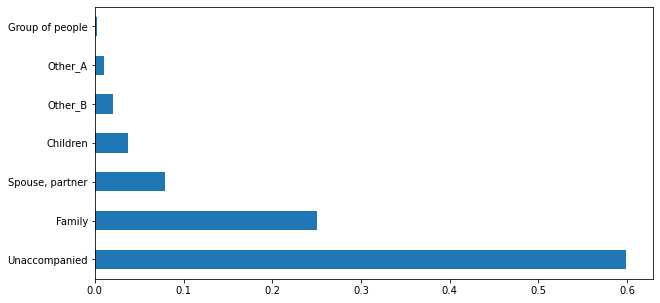

In [74]:
previous_dataset['NAME_TYPE_SUITE'].value_counts(normalize = True).plot.barh(figsize = (10,5))

### Reasons:

#### Since the null value percentage  is huge,we cannot replace with the most frquest "Unaccompanied" without having proper source of data ,so replacing it with 'Other' category.

In [75]:
## replace the missing value for 'NAME_TYPE_SUITE' as other_category
previous_dataset['NAME_TYPE_SUITE'] = previous_dataset['NAME_TYPE_SUITE'].fillna("Other_Category")

<AxesSubplot:>

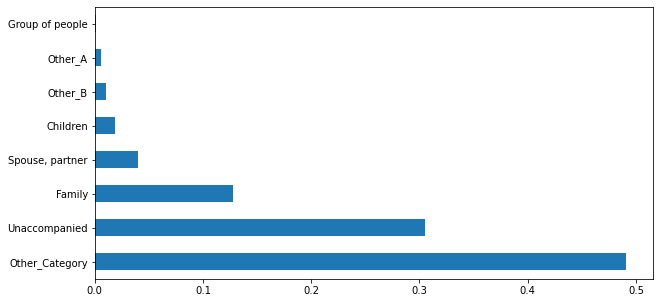

In [81]:
previous_dataset['NAME_TYPE_SUITE'].value_counts(normalize = True).plot.barh(figsize = (10,5))

## Missing values Imputation for numerical columns:

In [76]:
numerical_columns_previous = previous_dataset.select_dtypes(include=["number"]).columns

In [77]:
numerical_columns_previous

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [78]:
((previous_dataset[numerical_columns_previous].isnull().sum())/len(previous_dataset))*100

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
AMT_ANNUITY                  22.270576
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000000
AMT_GOODS_PRICE              23.065789
HOUR_APPR_PROCESS_START       0.000000
NFLAG_LAST_APPL_IN_DAY        0.000000
DAYS_DECISION                 0.000000
SELLERPLACE_AREA              0.000000
CNT_PAYMENT                  22.270277
DAYS_FIRST_DRAWING           40.285723
DAYS_FIRST_DUE               40.285723
DAYS_LAST_DUE_1ST_VERSION    40.285723
DAYS_LAST_DUE                40.285723
DAYS_TERMINATION             40.285723
NFLAG_INSURED_ON_APPROVAL    40.285723
dtype: float64

AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT - Mean/Median

Days related columns replace with mode

### 1. Considering the customer also exists in the previous_dataset, here we will  perform 
### 2. 